In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('emotions_train.csv')
df.shape

(21459, 2)

In [3]:
df.columns

Index(['Text', 'Emotion'], dtype='object')

Le jeu de données fournis est composé de deux colonnes : Text qui rassemble les postes des utilisateurs d'un réseau social et Emotion qui associe les postes à une émotion.
Nous disposons de 21459 enregistrements.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


Il n'y a aucune données manquantes

In [5]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

Les différentes émotions répertoriées sont : la tristesse, la colère, l'amour, la surprise, la peur et la joie.

In [6]:
df['Emotion'].value_counts()

Emotion
joy         7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

In [8]:
min_count = df['Emotion'].value_counts().min()

# Create a list to hold the undersampled DataFrames
undersampled_dfs = []

# Loop over each unique emotion
for emotion in df['Emotion'].value_counts().index:
    # Sample min_count rows from each emotion
    df_emotion = df[df['Emotion'] == emotion].sample(n=min_count, random_state=42)
    # Append the undersampled DataFrame to the list
    undersampled_dfs.append(df_emotion)

# Concatenate all the undersampled DataFrames
df_undersampling = pd.concat(undersampled_dfs)

# Shuffle the resulting DataFrame to mix the emotions
df_undersampling = df_undersampling.sample(frac=1, random_state=42).reset_index(drop=True)

df_undersampling

df_undersampling.to_csv('df_undersampling_train.csv', index=False)

([<matplotlib.patches.Wedge at 0x230672ef850>,
 [Text(-0.942487079201631, 0.5672019971209363, 'sadness'),
  Text(-0.18209889307786742, -1.0848225629750774, 'anger'),
  Text(1.0208207145542396, -0.40978661366249136, 'love'),
  Text(0.9930187710721767, 0.47319522429786226, 'surprise'),
  Text(0.5250620868910214, 0.9665970230192341, 'fear'),
  Text(0.14116350121630789, 1.0909046089940007, 'joy')],
 [Text(-0.5140838613827078, 0.30938290752051073, '32.8%'),
  Text(-0.09932666895156403, -0.5917213979864058, '29.2%'),
  Text(0.5568112988477669, -0.2235199710886316, '13.9%'),
  Text(0.5416466024030054, 0.2581064859806521, '12.4%'),
  Text(0.2863975019405571, 0.5272347398286731, '7.6%'),
  Text(0.07699827339071338, 0.5950388776330913, '4.1%')])

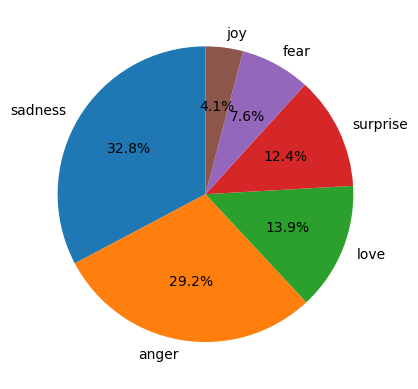

In [9]:
labels=df['Emotion'].unique()
plt.pie(df['Emotion'].value_counts(), labels=labels,autopct='%1.1f%%', startangle=90)

In [18]:
df_test = pd.read_csv('emotions_test.csv')
df_test.rename(columns={'sentiment': 'Emotion'}, inplace=True)
df_test.rename(columns={'content': 'Text'}, inplace=True)
df_test

,tweet_id,Emotion,author,Text
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,joy,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [19]:
df_test['Emotion'].value_counts()

Emotion
neutral       8638
worry         8459
joy           5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [20]:
df_love_surprise = df_test.loc[(df_test['Emotion'] == 'love') | (df_test['Emotion'] == 'surprise'), ['Emotion', 'Text']]
df_fusion = pd.concat([df, df_love_surprise])
df_fusion

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
39984,@iscreamshinki Oh that's why.,surprise
39989,His snoring is so annoying n it keeps me from ...,love
39996,Happy Mothers Day All my love,love
39997,Happy Mother's Day to all the mommies out ther...,love


In [ ]:
df_fusion['Emotion'].value_counts()
df_fusion.to_csv('df_fusion_oversample.csv', index=False)

In [22]:
min_count = df_fusion['Emotion'].value_counts().min()

# Create a list to hold the undersampled DataFrames
undersampled_dfs = []

# Loop over each unique emotion
for emotion in df_fusion['Emotion'].value_counts().index:
    # Sample min_count rows from each emotion
    df_emotion = df_fusion[df_fusion['Emotion'] == emotion].sample(n=min_count, random_state=42)
    # Append the undersampled DataFrame to the list
    undersampled_dfs.append(df_emotion)

# Concatenate all the undersampled DataFrames
df_undersampling = pd.concat(undersampled_dfs)

# Shuffle the resulting DataFrame to mix the emotions
df_undersampling = df_undersampling.sample(frac=1, random_state=42).reset_index(drop=True)

df_undersampling

df_undersampling.to_csv('df_undersampling_fusion.csv', index=False)

In [24]:
df_undersampling['Emotion'].value_counts()

Emotion
surprise    2652
love        2652
anger       2652
joy         2652
sadness     2652
fear        2652
Name: count, dtype: int64

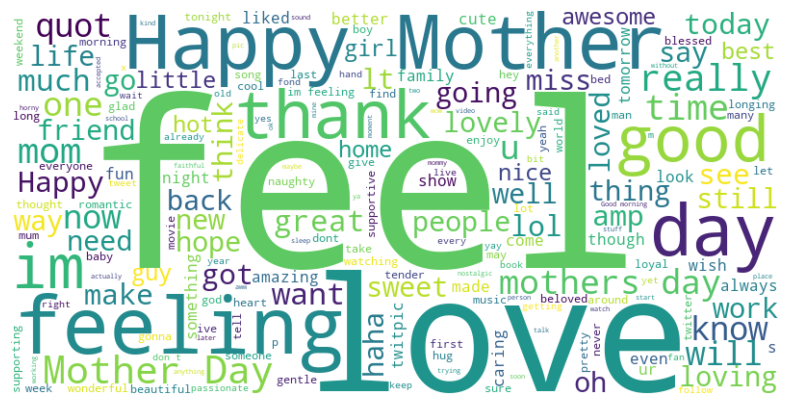

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_fusion_love = df_fusion.loc[df_fusion['Emotion']=='love']

# Exemple de texte
texte = " ".join(df_fusion_love['Text'])

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(texte)

wordcloud.to_file("nuage_de_mots_love.png")
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
